In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
def gibbs_sampler(mus, sigmas, n_iter = 10000):
    samples = []
    y = mus[1]
    for _ in range(n_iter):
        x = p_x_y(y, mus, sigmas)
        y = p_y_x(x, mus, sigmas)
        samples.append([x, y])
    return samples

def p_x_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

def p_y_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


mus = np.array([5, 5])
sigmas = np.array([[1, 0.9], [0.9, 1]])
samples = gibbs_sampler(mus, sigmas)

#def Xextract(lst):
#    return [item[0] for item in lst]

#def Yextract(lst):
#    return [item[1] for item in lst]

df = pd.DataFrame(samples, columns = ['x', 'y'])
x = df['x']
y = df['y']

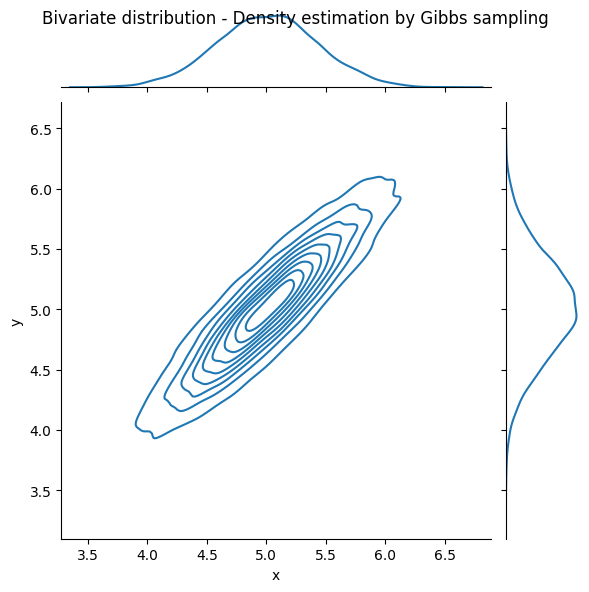

In [90]:
burnin = 200
sns.jointplot(df[burnin:], x = x, y = y, kind = 'kde')
plt.suptitle('Bivariate distribution - Density estimation by Gibbs sampling')
plt.show()

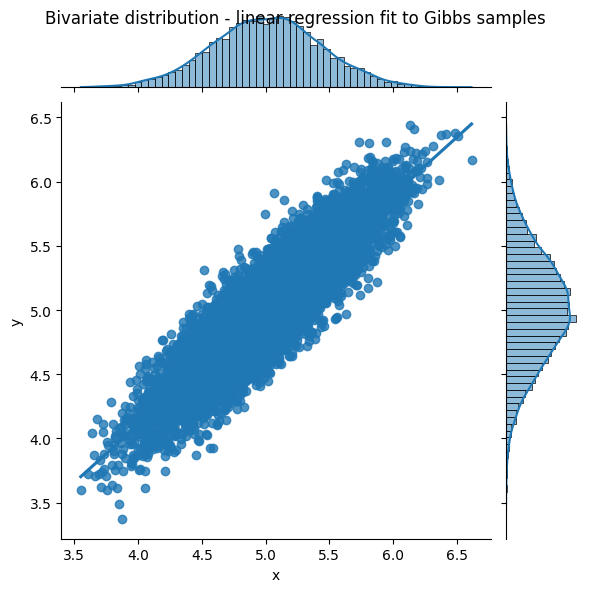

In [88]:
burnin = 800
sns.jointplot(df[burnin:], x = x, y = y, kind = 'reg')
plt.suptitle('Bivariate distribution - linear regression fit to Gibbs samples')
plt.show()